In [1]:
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
PATH = "C:\chromedriver.exe"

In [ ]:
driver = webdriver.Chrome(PATH)

In [ ]:
jobs={"Job_Role":[],
     "Company_name":[],
     "Location":[],
     "Desired_Experience":[],
     "Skills_Required":[],
     "Salary_Expected":[],
     "Stats":[],
     "Job_Description":[],
     "Education":[]}
link_desc={"link":[]}

In [ ]:
for i in range(750,755): 
        driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
        time.sleep(3)
        lst=driver.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")

        for job in lst:
            driver.implicitly_wait(10)
            link=job.find_element_by_css_selector('a.title.fw500.ellipsis').get_attribute('href')
            link_desc["link"].append(link)

In [ ]:
for lnk in link_desc["link"]:
    driver.get(lnk)
    time.sleep(3)
    lst1=driver.find_elements_by_css_selector("section.jd-header")
    lst2=driver.find_elements_by_css_selector("section.job-desc")

    for x in lst1:
        role=x.find_element_by_css_selector("div.jd-top-head").text
        company=x.find_element_by_css_selector("div.jd-header-comp-name").text
        location=x.find_element_by_css_selector("div.loc").text
        exp=x.find_element_by_css_selector("div.exp").text
        salary=x.find_element_by_css_selector("div.salary").text
        stats=x.find_element_by_css_selector("div.jd-stats").text

    for y in lst2:
        skills=y.find_element_by_css_selector("div.key-skill").text
        JD=y.find_element_by_css_selector("div.dang-inner-html").text
        education=y.find_element_by_css_selector("div.education").text

    jobs["Job_Role"].append(role)
    jobs["Company_name"].append(company)
    jobs["Location"].append(location)
    jobs["Desired_Experience"].append(exp)
    jobs["Skills_Required"].append(skills)
    jobs["Stats"].append(stats)
    jobs["Salary_Expected"].append(salary)
    jobs["Job_Description"].append(JD)
    jobs["Education"].append(education)

In [ ]:
#data = pd.DataFrame.from_dict(jobs)
#data.shape

In [2]:
#Dataset with complete Job Description
Data_with_Desc=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\P35-NLP\\Data_with_Desc.csv")

In [49]:
JD=Data_with_Desc["Job_Description"]

In [3]:
#Dataframe without JD and Stats
Data_Scrapped=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\P35-NLP\\Data_Scrapped.csv")

In [4]:
Data_with_Desc.drop(["Stats","Job_Description"], inplace=True, axis=1)
Final_Data = Data_with_Desc.append(Data_Scrapped)
Final_Data.shape

(15031, 7)

In [ ]:
#Final_data = Final_Data.to_csv(r'C:\Users\dell\Desktop\Final_data.csv', index = False)

In [5]:
pd.options.display.max_columns = None #Helps to see all column names in the Dataset

In [6]:
Final_Data.head()

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
0,Data Scientist\nIBM India Pvt. Limited4.0(8564...,IBM India Pvt. Limited4.0(8564 Reviews),India,0 - 5 years,Key Skills\nNLPArtificial IntelligenceData Sci...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
1,Principal Data Scientist - Machine/Deep Learni...,Fidius advisory,Bengaluru,8 - 13 years,Key Skills\nTensorflowNLPPyTorchdata sciencepr...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
2,Data Scientist - Image Recognition/Machine Lea...,CarbyneTech India3.1(7 Reviews),Hyderabad,5 - 10 years,Key Skills\nNLPData ScientistTime Series Analy...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
3,Data Scientist - Image Processing/Machine Lear...,CarbyneTech India3.1(7 Reviews),Hyderabad,6 - 11 years,Key Skills\nPredictive ModelingData ScienceDat...,Not Disclosed,"Education\nUG :BCA in Computers, B.A in Econom..."
4,Data Scientist - Image Processing/ Machine Lea...,CarbyneTech India3.1(7 Reviews),Hyderabad,6 - 11 years,Key Skills\nPredictive ModelingData ScienceDat...,Not Disclosed,"Education\nUG :BCA in Computers, B.Sc in Any S..."


In [7]:
Final_Data.tail()

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
14626,Senior Python Developer / Team Lead\nConfidential,Confidential,Ahmedabad,2 - 7 years,Key Skills\nNltkGITLinuxDjangoCloudMachine Lea...,Not Disclosed,"Education\nUG :B.Tech/B.E. in Computers, BCA i..."
14627,Chief Project Manager\nHailstone Innovations P...,Hailstone Innovations Private Limited 3.5(12 R...,"Palakkad, Kochi, Coimbatore",10 - 15 years,Key Skills\nTeam ManagementLeadershipSAPTime M...,"₹ 20,00,000 - 22,50,000 P.A.",Education\nUG :B.Tech/B.E. in Any Specializati...
14628,"Full Stack Developer (Expertise in node.js, aw...",Nirmal Bang Group is hiring for one of its ass...,"Greater Noida, Noida",3 - 6 years,Key Skills\nNode.Js\nSoftware DevelopmentDocke...,Not Disclosed,Education\nUG :B.Tech/B.E. in Any Specializati...
14629,MIS Executive\nPeoples Mutually Aided Co Opera...,Peoples Mutually Aided Co Operative Credit Soc...,Vijayawada,1 - 6 years,Key Skills\nPivot TableSUMIFExcelVLOOKUPMIS Op...,"₹ 1,75,000 - 2,25,000 P.A.",Education\nUG :B.Com in Any Specialization
14630,Digital Marketing Specialist\nXortix Services ...,Xortix Services Pvt. Ltd.,Mohali,1 - 3 years,Key Skills\nPaid AdsDigital MarketingFacebook ...,Not Disclosed,Education\nUG :Any Graduate in Any Specialization


In [8]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 14630
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Role            15031 non-null  object
 1   Company_name        15031 non-null  object
 2   Location            15031 non-null  object
 3   Desired_Experience  15031 non-null  object
 4   Skills_Required     15031 non-null  object
 5   Salary_Expected     15031 non-null  object
 6   Education           15031 non-null  object
dtypes: object(7)
memory usage: 939.4+ KB


In [9]:
Final_Data.nunique()

Job_Role              9369
Company_name          4136
Location               783
Desired_Experience     141
Skills_Required       8119
Salary_Expected        328
Education             1198
dtype: int64

In [10]:
Final_Data.dtypes

Job_Role              object
Company_name          object
Location              object
Desired_Experience    object
Skills_Required       object
Salary_Expected       object
Education             object
dtype: object

In [11]:
Final_Data.describe()

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
count,15031,15031,15031,15031,15031,15031,15031
unique,9369,4136,783,141,8119,328,1198
top,"Senior Consultant Strategy Consulting, Technol...",ADEEBA E SERVICES PVT LTD3.6(18 Reviews),Bengaluru,5 - 10 years,Key Skills\ntech supportBPOvoiceHelp DeskCusto...,Not Disclosed,Education\nUG :Any Graduate in Any Specializat...
freq,658,1259,3411,1350,1188,13494,5763


# Data Visualization

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Final_Data, title='Pandas Profiling Report', explorative=True) 

In [13]:
profile.to_widgets() #To get overview of complete Data

In [ ]:
profile.to_file(output_file=('pandas_profiling_P35.html')) # Save the report as html file 

# Data Pre-Processing

In [14]:
#Checking NA Values
Final_Data.isna().sum()

#No Missing Cells Present in Data

Job_Role              0
Company_name          0
Location              0
Desired_Experience    0
Skills_Required       0
Salary_Expected       0
Education             0
dtype: int64

In [5]:
#Checking Duplicate Values
Final_Data[Final_Data.duplicated(subset=["Job_Role","Company_name","Location","Desired_Experience","Skills_Required","Salary_Expected","Education"])].shape

(4815, 7)

In [6]:
print("Before dropping duplicates : ",Final_Data.shape)
Final_Data.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : ",Final_Data.shape)

Before dropping duplicates :  (15031, 7)
After dropping duplicates :  (10216, 7)


In [8]:
Final_Data.shape

(10216, 7)

In [9]:
#lower case all the strings to avoid redundancy
Final_Data=Final_Data.apply(lambda x: x.astype(str).str.lower())

In [10]:
#Multiple Job locations and skill are associated to each job, so splitting 'Location' and 'Skills_Required'
Final_Data.Skills_Required=[skill.split("\n") for skill in Final_Data.Skills_Required]
Final_Data.Location=[Location.split(",") for Location in Final_Data.Location]
Final_Data.Education=[Education.split("\n") for Education in Final_Data.Education]
Final_Data[50:60]

,Job_Role,Company_name,Location,Desired_Experience,Skills_Required,Salary_Expected,Education
69,opening for senior data scientist - mumbai loc...,mahindra holidays and resorts india limited3.9...,[mumbai],6 - 11 years,"[key skills, artificial intelligencedata analy...","₹ 8,00,000 - 12,00,000 p.a.","[education, ug :b.tech/b.e. in any specializat..."
70,lets connect to explore new role : data scient...,cuelogic technologies pvt ltd4.0(28 reviews),[pune],4 - 8 years,"[key skills, deep learning frameworksalgorithm...",not disclosed,"[education, ug :any graduate in any specializa..."
71,lead data scientist - deep learning/machine le...,confidential,[bengaluru],4 - 9 years,"[key skills, ropencvdata scientistdata managem...",not disclosed,"[education, ug :b.a in economics, english, sta..."
72,chief data scientist - machine learning/ pytho...,catalyst,[bengaluru],7 - 12 years,"[key skills, data sciencerdata scientisthadoop...",not disclosed,"[education, ug :b.tech/b.e. in computers, b.sc..."
73,chief data scientist - machine learning/ pytho...,catalyst,[bengaluru],9 - 14 years,"[key skills, data scienceralgorithmsdata struc...",not disclosed,"[education, ug :any graduate in any specializa..."
74,chief data scientist - machine learning/python...,catalyst,[bengaluru],7 - 12 years,"[key skills, data scienceralgorithmsdata struc...",not disclosed,"[education, ug :b.sc in maths, computers, stat..."
75,data scientist - machine learning\ncatalyst\nh...,catalyst,[bengaluru],2 - 7 years,"[key skills, data sciencedata qualitydata scie...",not disclosed,"[education, ug :bca in computers, b.sc in any ..."
76,data scientist\naryng,aryng,[india],5 - 10 years,"[key skills, data sciencedata scientistdata ma...",not disclosed,"[education, ug :any graduate in any specializa..."
77,data scientist - r/python - iit/nit/bits\neic ...,eic tec hsys,[delhi/ncr delhi ncr],3 - 8 years,"[key skills, data sciencerelasticsearchdata sc...",not disclosed,"[education, ug :bca in computers, b.sc in any ..."
78,senior data scientist\ncognial artificial inte...,cognial artificial intelligence solutions pvt ...,[hyderabad],4 - 6 years,"[key skills, nlpmachine learninganalyticsocr]",not disclosed,"[education, ug :b.tech/b.e. in any specializat..."


In [12]:
Final_Clean = Final_Data.to_csv(r'C:\Users\dell\OneDrive\Desktop\P35-NLP\Final_Clean.csv', index = False)

## Forming Word Cloud for Job_Description Column

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [44]:
#from nltk.corpus import stopwords 
#nltk.download('stopwords') 
#stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
######################## Basic text preprocessing ########################## 
JD=JD.apply(lambda x:" ".join(x.lower() for x in x.split())) ##Lower case###
JD=JD.str.replace('[^\w\s]','')  ## Removing punctuations
JD=JD.str.replace('\d+', '')  ##Removal of digits
JD=JD.str.strip()  ##Removal of white spaces

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
##Lemmatization
lemmatizer=WordNetLemmatizer()
JD = JD.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [48]:
###top 10 most frequent repeated words in Job_Description
freq1 = pd.Series(' '.join(JD).split()).value_counts()[:10]
freq1

and           5634
to            2935
data          2708
of            2400
in            2229
a             2059
the           1986
with          1790
experience    1455
for           1028
dtype: int64

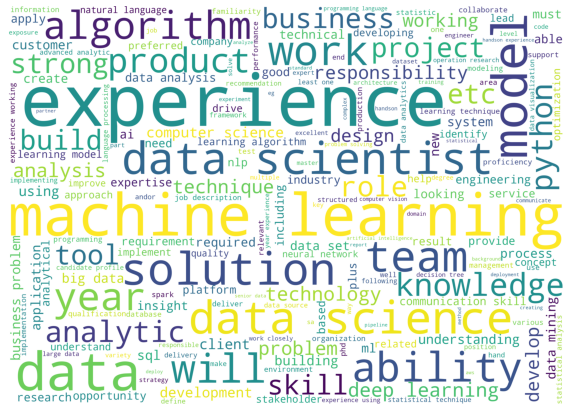

In [29]:
########### Wordcloud generation ###############
Description_text = ' '.join(JD)
Description_wordcloud=WordCloud(background_color='white',width=3500,height=2500).generate(Description_text)
fig = plt.figure(figsize = (10, 15))
plt.axis('off')
plt.imshow(Description_wordcloud)